## Data

Seattle Police Department (SPD) has been collecting detailed data about cars collisions. It will be used for developing model that allows to determine locations, weather conditions, days of week, time of day and other factors that are helpful for car collisions prediction.The dataset is available at https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv File with metadata is available at https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
list(df.columns)

['SEVERITYCODE',
 'X',
 'Y',
 'OBJECTID',
 'INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYCODE.1',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR']

We will be focussing on Severity code as our target or dependent variable

In [6]:
df['SEVERITYCODE.1'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

For our problem our independent variables will be ADDRTYPE, SEVERITYCODE, COLLISIONTYPE, UNDERINFL, PEDCOUNT,INCDTTM, WEATHER, ROADCOND, LIGHTCOND. This parameters will help us in giving a good analysis of what are the major factors and there correlation to car collisions

In [7]:
df1=df[['ADDRTYPE','COLLISIONTYPE','UNDERINFL','PEDCOUNT','INCDATE','WEATHER','ROADCOND','LIGHTCOND','SEVERITYCODE']]

In [8]:
df1.head(5)

,ADDRTYPE,COLLISIONTYPE,UNDERINFL,PEDCOUNT,INCDATE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Intersection,Angles,N,0,2013/03/27 00:00:00+00,Overcast,Wet,Daylight,2
1,Block,Sideswipe,0,0,2006/12/20 00:00:00+00,Raining,Wet,Dark - Street Lights On,1
2,Block,Parked Car,0,0,2004/11/18 00:00:00+00,Overcast,Dry,Daylight,1
3,Block,Other,N,0,2013/03/29 00:00:00+00,Clear,Dry,Daylight,1
4,Intersection,Angles,0,0,2004/01/28 00:00:00+00,Raining,Wet,Daylight,2


Data wrangling of the select attributes are done. We first find the cells having bull values and then delete those data points from the data set

In [9]:
missing_data = df1.isnull()
missing_data.head(5)

,ADDRTYPE,COLLISIONTYPE,UNDERINFL,PEDCOUNT,INCDATE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64



In [11]:
df1.dropna(axis=0,inplace=True)

In [12]:
df1.shape

(187504, 9)

Checking the values in the selected columns

In [13]:
for column in df1:
    print(column)
    print(df1[column].value_counts())
    print('')

ADDRTYPE
Block           123315
Intersection     63447
Alley              742
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
Parked Car    46679
Angles        34555
Rear Ended    33794
Other         23440
Sideswipe     18442
Left Turn     13659
Pedestrian     6589
Cycles         5399
Right Turn     2936
Head On        2011
Name: COLLISIONTYPE, dtype: int64

UNDERINFL
N    98731
0    79706
Y     5075
1     3992
Name: UNDERINFL, dtype: int64

PEDCOUNT
0    180585
1      6665
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

INCDATE
2006/11/02 00:00:00+00    96
2008/10/03 00:00:00+00    90
2005/05/18 00:00:00+00    84
2005/11/05 00:00:00+00    83
2006/01/13 00:00:00+00    83
                          ..
2020/02/23 00:00:00+00     1
2020/02/16 00:00:00+00     1
2015/12/25 00:00:00+00     1
2020/02/11 00:00:00+00     1
2020/04/26 00:00:00+00     1
Name: INCDATE, Length: 5948, dtype: int64

WEATHER
Clear                       110493
Raining               

Data in column UNDERINFL is amended

In [14]:
df1['UNDERINFL'].replace('0','N',inplace=True)
df1['UNDERINFL'].replace('1','Y',inplace=True)

Conversion of INCDTTM to days of week and time of day

In [15]:
df1['INCDATE']=pd.to_datetime(df1['INCDATE'])

In [16]:
df1['WEEKDAY'] = df1['INCDATE'].dt.dayofweek
df1['WEEKDAY'].replace([0,1,2,3],'WORK',inplace=True)
df1['WEEKDAY'].replace([4,5,6],'WEND',inplace=True)

In [17]:
df1.head()

,ADDRTYPE,COLLISIONTYPE,UNDERINFL,PEDCOUNT,INCDATE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE,WEEKDAY
0,Intersection,Angles,N,0,2013-03-27 00:00:00+00:00,Overcast,Wet,Daylight,2,WORK
1,Block,Sideswipe,N,0,2006-12-20 00:00:00+00:00,Raining,Wet,Dark - Street Lights On,1,WORK
2,Block,Parked Car,N,0,2004-11-18 00:00:00+00:00,Overcast,Dry,Daylight,1,WORK
3,Block,Other,N,0,2013-03-29 00:00:00+00:00,Clear,Dry,Daylight,1,WEND
4,Intersection,Angles,N,0,2004-01-28 00:00:00+00:00,Raining,Wet,Daylight,2,WORK


Data visualization

Plotting the dependent variable 'SEVERITYCODE' against the chosen independent variables in a bar plot to visualise which factors have most impacts on 'SEVERITYCODE'

In [18]:
def f1(df,i):
    plt.rcParams.update({'font.size': 10})
    fig = plt.figure()
    ax = df.T.plot(kind='bar',figsize=(6, 4),width = 0.5,color=['#d9534f','#d9994f'])
    ax.set_title(i, fontsize=12)
    ax.set_xticklabels(df.columns,fontsize=10)
    ax.legend(fontsize=10)
    plt.show()

<Figure size 432x288 with 0 Axes>

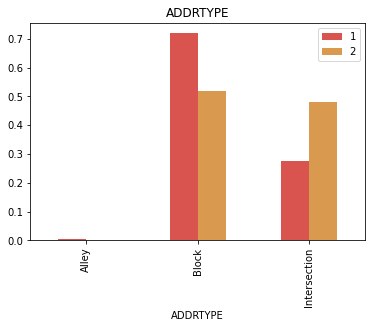

<Figure size 432x288 with 0 Axes>

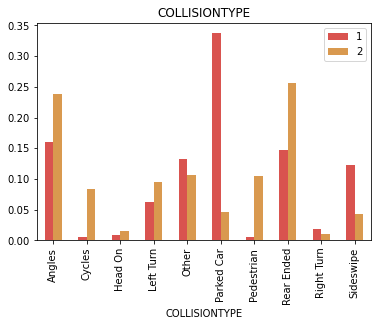

<Figure size 432x288 with 0 Axes>

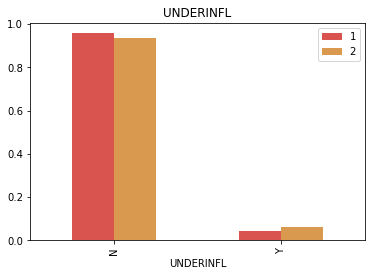

<Figure size 432x288 with 0 Axes>

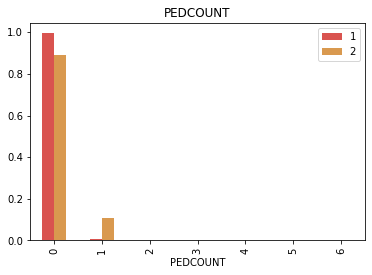

<Figure size 432x288 with 0 Axes>

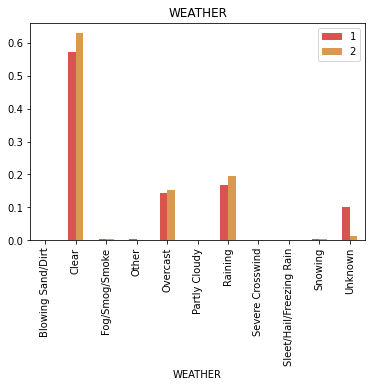

<Figure size 432x288 with 0 Axes>

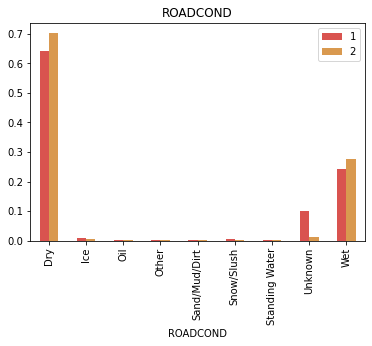

<Figure size 432x288 with 0 Axes>

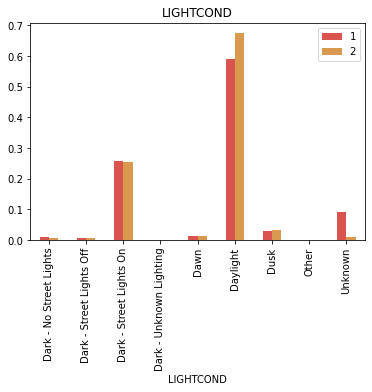

<Figure size 432x288 with 0 Axes>

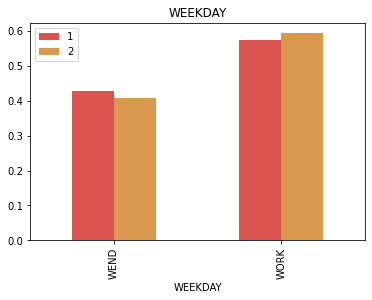

In [19]:
for i in ['ADDRTYPE','COLLISIONTYPE','UNDERINFL','PEDCOUNT','WEATHER','ROADCOND','LIGHTCOND','WEEKDAY']:
    df2 = pd.pivot_table(df1, values='INCDATE', index=['SEVERITYCODE'],
                    columns=[i], aggfunc='count')
    df3= df2.div(pd.Series(df2.sum(axis=1).values, index=[1, 2]), axis='index')
    f1(df3,i)

Developing the model

Selecting variable that we will be using for training the models and select the best suitable model

In [20]:
df4 = df1[['ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND','WEEKDAY','SEVERITYCODE']]

In [21]:
ADDRTYPE = df4['ADDRTYPE'].value_counts().index.to_list()
COLLISIONTYPE = df4['COLLISIONTYPE'].value_counts().index.to_list()
WEATHER = df4['WEATHER'].value_counts().index.to_list()
ROADCOND = df4['ROADCOND'].value_counts().index.to_list()
LIGHTCOND = df4['LIGHTCOND'].value_counts().index.to_list()
WEEKDAY = df4['WEEKDAY'].value_counts().index.to_list()
df4['ADDRTYPE']=pd.factorize(df4['ADDRTYPE'])[0]
df4['COLLISIONTYPE']=pd.factorize(df4['COLLISIONTYPE'])[0]
df4['WEATHER']=pd.factorize(df4['WEATHER'])[0]
df4['ROADCOND']=pd.factorize(df4['ROADCOND'])[0]
df4['LIGHTCOND']=pd.factorize(df4['LIGHTCOND'])[0]
df4['WEEKDAY']=pd.factorize(df4['WEEKDAY'])[0]

In [22]:
df4.head()

,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,WEEKDAY,SEVERITYCODE
0,0,0,0,0,0,0,2
1,1,1,1,0,1,0,1
2,1,2,0,1,0,0,1
3,1,3,2,1,0,1,1
4,0,0,1,0,0,0,2


Preparing training and test data

In [23]:
X = df4[['ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND','WEEKDAY']].values  #.astype(float)
X[0:5]

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [1, 2, 0, 1, 0, 0],
       [1, 3, 2, 1, 0, 1],
       [0, 0, 1, 0, 0, 0]])

In [24]:
y = df4['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [25]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

We will be using two models for our supervised model developement. They are K-Nearest Neighbors and Logistic Regression

K-Nearest Neighbors

In [27]:
Ks = 12
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

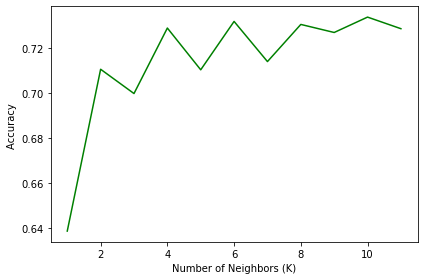

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

The higest accuracy of K-Nearest Neighbors algorithm with k=10

In [35]:
neigh = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)
yhat=neigh.predict(X_test)
KN_fsc = f1_score(y_test, yhat, average='weighted') 
KN_jc = jaccard_similarity_score(y_test, yhat)

Logistic Regression

In [30]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
LR_acc = np.zeros(5)
i = 0
for n in solver:
    LR = LogisticRegression(C=0.01, class_weight = 'balanced',solver=n).fit(X_train,y_train)
    yhat = LR.predict(X_test)
    LR_acc[i] = metrics.accuracy_score(y_test, yhat)
    i+=1

In [31]:
for i in range(5):
    print(solver[i], '= ', round(LR_acc[i],3))

newton-cg =  0.653
lbfgs =  0.653
liblinear =  0.653
sag =  0.653
saga =  0.653


In [32]:
LR_fsc = f1_score(y_test, yhat, average='weighted') 
LR_jc = jaccard_similarity_score(y_test, yhat)

Model Summary

In [33]:
rep = pd.DataFrame({'Algorithm':['KNN','LR'], 'Jaccard':[0, 0],'F1 score':
                   [0,0], 'Average':[0,0]})
rep.set_index('Algorithm',inplace=True)

In [36]:
rep.loc['KNN','F1 score']=round(KN_fsc,3) 
rep.loc['KNN','Jaccard']=round(KN_jc,3)
rep.loc['KNN','Average']=round((KN_jc+KN_fsc)/2,3)
rep.loc['LR','F1 score']=round(LR_fsc,3) 
rep.loc['LR','Jaccard']=round(LR_jc,3)
rep.loc['LR','Average']=round((LR_jc+LR_fsc)/2,3)
rep

,Jaccard,F1 score,Average
Algorithm,,,
KNN,0.734,0.709,0.721
LR,0.653,0.666,0.659


K-Nearest Neighbors model has the highest average accuracy so we will be using it to identify the combination of factors that allows us to predict the severity of car collisions